Draft notebook for combininig the GJ 674 spectrum.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

20190301 Start with a simple plot of everything, may be good for exoupdate as well.

Text(0, 0.5, 'Flux (erg s$^{-1}$cm$^{-2}$\\AA$^{-1}$)')

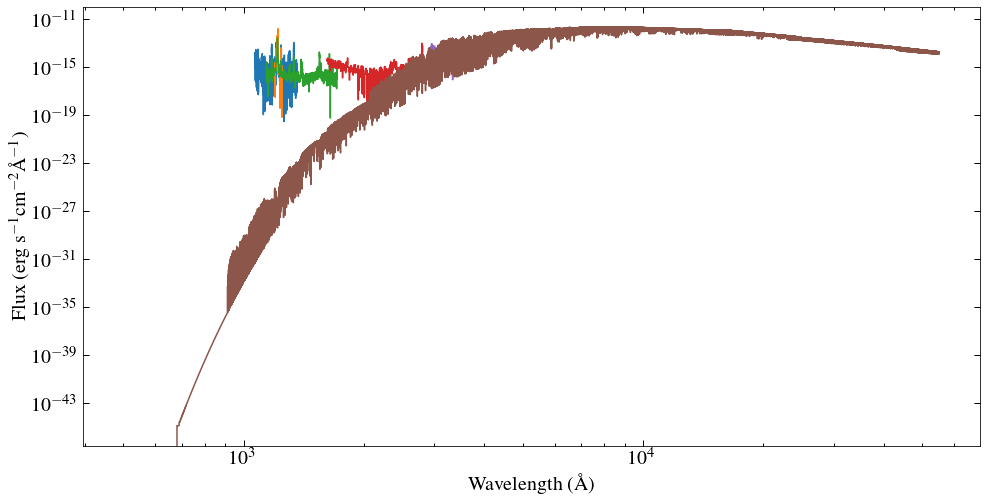

In [4]:
plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)


#COS
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
mask = data['Flux'] > 0
plt.step(data['Wave'][mask], data['Flux'][mask])


#STIS
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_st, clip_end = 20,-1 #points to clip off ccd spectrum  
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])

#phoenix
w = fits.getdata('../PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits',0)
f = fits.getdata('../PHOENIX/lte03600-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')
mask = (w>data['WAVELENGTH'][-1])
scale = f[mask][0]/data['FLUX'][-1]
plt.step(w,f/scale, label= 'GJ674')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
#plt.savefig('GJ674_rough.png', dpi=150)

#add the solar spectrum
#sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
#sw = sol_spec['wave']*10
#sf = sol_spec['flux']*100
#scale2 = max(f/scale)/max(sf)
#mask = sw > 1100 
#plt.plot(sw[mask], sf[mask]*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)

#plt.savefig('GJ674_rough_wSun.png', dpi=150)
#plt.legend()

Going to get photometery and test the Phoenix model before going any further.

How far does Phoenix go- can I do KF's suggestion of adding the emission lines to a model photosphere. Ok stretchs accross the entire range, good.

Ok, let's forget about Phoenix for a while and concentrate on sicking the UV together. I'm going to transfere the uv code to a script to easily zoom etc. See uv_stick.py.

G130M 1069.0 1361.99836
G140M 1194.8030171119033 1249.3432603513886
G140L 1119.1184042991194 1715.735427461613
G230L 1615.7871091090767 3144.179933910513
G430L 2943.7951227235403 5694.747473727125


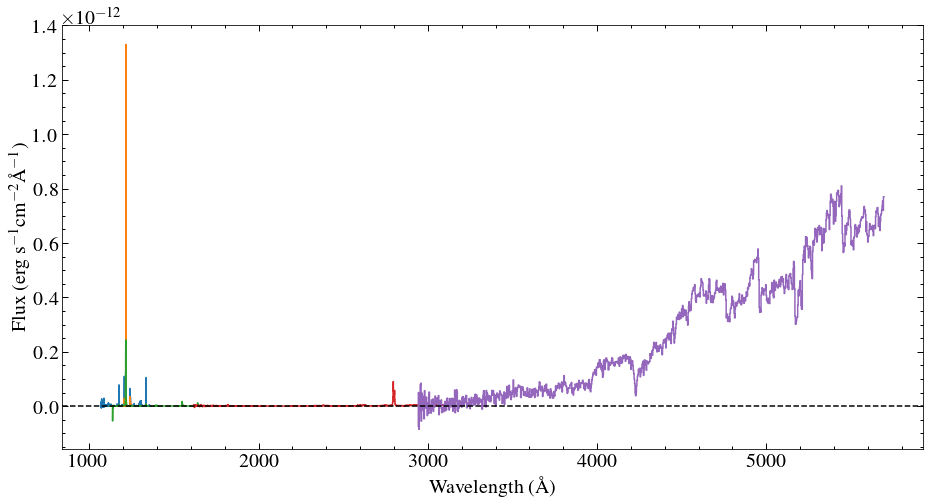

In [7]:

plt.figure(figsize = (13, 7))
plt.subplots_adjust(top = 0.95, right = 0.99, left = 0.07, bottom = 0.11)


#COS
band = 'G130M'
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
plt.step(data['Wave'], data['Flux'])
print(band, data['Wave'][0], data['Wave'][-1])


#STIS
band = 'G140M'
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
plt.step(data['WAVELENGTH'], data['FLUX'])
print(band, data['WAVELENGTH'][0], data['WAVELENGTH'][-1])

band = 'G140L'
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
plt.step(data['WAVELENGTH'], data['FLUX'])
print(band, data['WAVELENGTH'][0], data['WAVELENGTH'][-1])


band = 'G230L'
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
plt.step(data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end])
print(band, data['WAVELENGTH'][clip_st:clip_end][0], data['WAVELENGTH'][clip_st:clip_end][-1])



band = 'G430L' #nb normalise to photometry, PHOENIX
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_st, clip_end = 20,-1 #points to clip off ccd spectrum  
plt.step(data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end])
print(band, data['WAVELENGTH'][clip_st:clip_end][0], data['WAVELENGTH'][clip_st:clip_end][-1])

plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
plt.axhline(0, ls='--', c='k')

plt.show()

In [8]:
#bandpasses
#G130M 1069.0 1361.99836
#G140M 1194.8030171119033 1249.3432603513886
#G140L 1119.1184042991194 1715.735427461613
#G230L 1615.7871091090767 3144.179933910513
#G430L 2943.7951227235403 5694.747473727125


Where is the COS lyman $\alpha$ gap? 1207.3-1224.2. Lets round to nearest Angstrom either side. At some point we'll need some overlap for STIS scaling as well.

COS spectrum is good right to the end, so we'll start the G140L spectrum from there. This leaves about a 0.5 A gap, but with no emmision lines so we can probably live with it.  Also will want to chop out airglow and fill with STIS.

Next is G140L to G230L. Error on G230L is much higher in the overlap, so we'll use G140L for that. Again a roughly 0.5 A gap.

Last is G430L. The uv end of G430L is terrible, so using G230L...

Looks great.

By eye there doesn't seem to be that much in the way of flux differences in the overlaps. Best check on a log scale...ok there are. Looks like G140L is the main culprit, fortunaly there's a large region of overlap with COS to fix it...next week.

To do: Fix flux differences, airglow lines, join into one spectrum, interpolate onto 1A grid, ly $\alpha$ reconstruction (Note CSF script for this in muscles/software).